## Credit Card Fraud Detection ##
__Goal__

In this notebook, my goal is to create a machine learning model to detect credit card fraud using a dataset from Kaggle. I would like to aim more than 90% of accuracy using a proper matric(the word accuracy here does not indicate a matric called accuracy). 
The target variable consists of 1 and 0. The values are encoded as 1 if they are frauds, otherwise 0. Thus, the model has to predict a value of the target variable given an instance. 

__Overview of the dataset__ 

The dataset contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 

__Brief explanation of variables__

- Time: seconds elapsed between a transaction and the very first transaction of this dataset(1st row of the dataset). 
- V1, V2, … V28: These are features that are trasfomed using PCA by the dataset provider. No more detailed information is available. 
- Amount:trasaction amount 
- Class: the target variable. 1 indicates a fraud. 0 indicates a normal transaction. 

In [1]:
import pandas as pd 
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## EDA ##
In this section, I will explore the dataset. 

In [2]:
## load the dataset first 
original_data = pd.read_csv('creditcard.csv')
data = original_data.copy()

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Investigate target variable ###
I will see a balance of the target variable. Specifically, I will see how much it is unbalanced. 

In [5]:
data['Class'].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This indicates that only 0.17 percent of the dataset is fraud instances. The dataset is heavily unbalanced. I think that I need to undersample, oversample, or datageneration before modeling. 

### Investigate predictors (Vs) ###
In this section, I will analyze the V variables. I will apply basic descriptive statistics and see if there are potential outliers. 

In [7]:
v_vars = data.filter(regex="V.")
v_vars.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [8]:
#apply descriptive statistics to the dataset 
v_vars.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01


<AxesSubplot:>

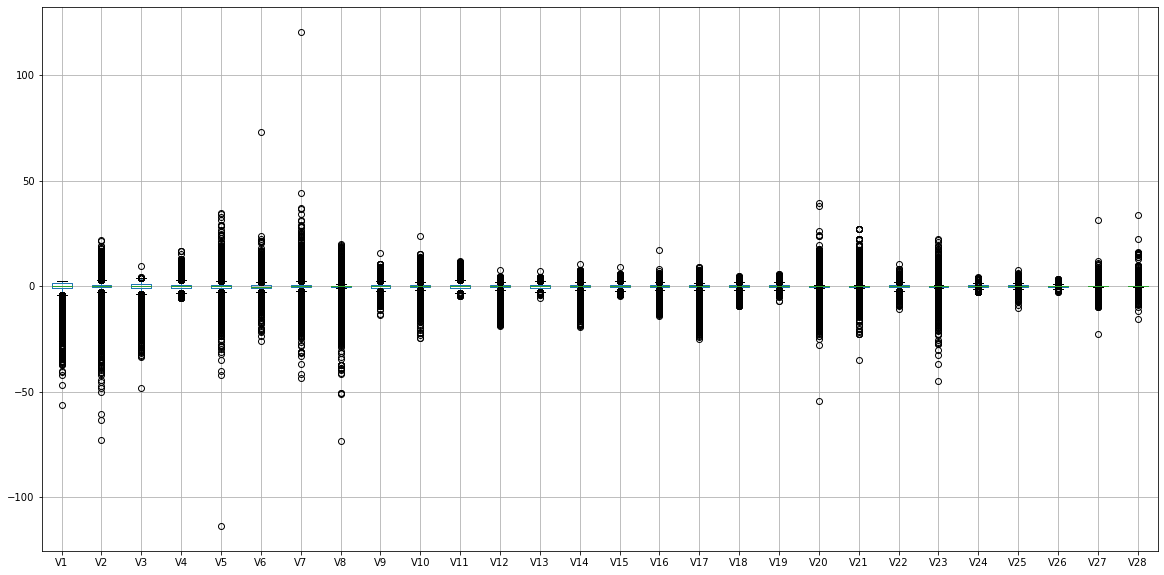

In [9]:
#creating boxplots (not limit axies)
v_vars.boxplot(column=list(v_vars.columns),figsize=(20,10))

These boxplots are not limited based on axies. Although many values are beyond wiskers, there are other values that are significantly different from others. For instance, V5, V6, and V7 have values that are far from other values. They must be outliers. However, those outliers might indicate fradulent transactions, so I will leave them for now. I will look at relationships among variables later. 

(-20.0, 20.0)

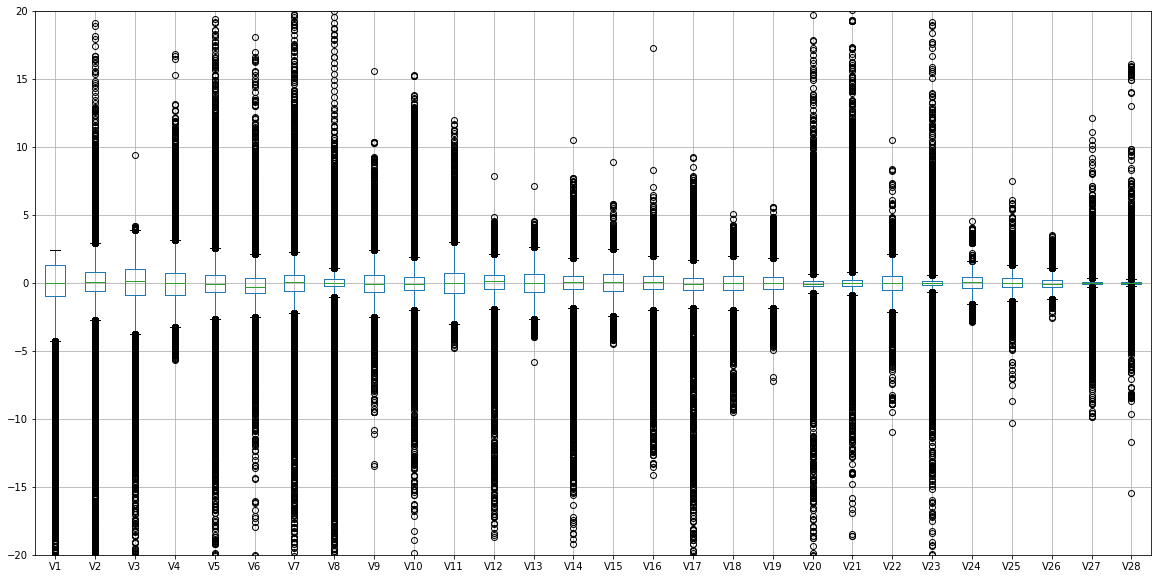

In [10]:
#limit y axis 
v_vars.boxplot(column=list(v_vars.columns),figsize=(20,10))
plt.ylim(-20,20)

- I focus only on boxes. V1 has the widest distribution. V27 Aand V28 have the narrowest distribution. V8, V20, V21, V23, and V26 have also relatively small distribution. 
- It is interesting that V1 has no values above the upper range. V3 seems also to have the characteristic. 
- V4, V11 have more values beyond the upper wisker. 
- V12, V24, and V17 have more values below the lower wisker. 

Since there is no background infromation about these variables, it is hard to decide which values are exactly outliers. However, when looking at the boxplots with no limitation on y axis, there are some values that are far from other values in some variables. I will treat them as outliers. 

### Investigate Time variable ###
I will distribution of time. I hope I can see when credit card transactions often occur if there is such a terend. Time variable is described as seconds. I will focus only on transactions that occured within 24 hours since the first transaction. 

In [11]:
time = data['Time']
trans_24 = time[time<=86400]

Text(0.5, 1.0, 'First 24 hours in seconds')

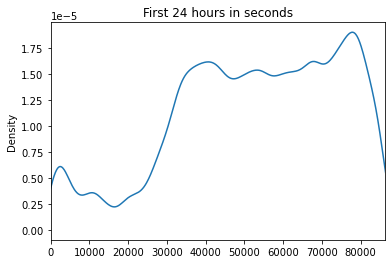

In [12]:
trans_24.plot.density()
plt.xlim(0,86400)
plt.title("First 24 hours in seconds")

I can see that the number of transactions first decline, then go up and become stedy and decline. 
Since it is unknown when the first transaction occured, I can't guess that which period of seconds is noon, morning, etc. However, based on this, it looks like that there is a trend 

Text(0.5, 1.0, 'Second 24 hours in seconds')

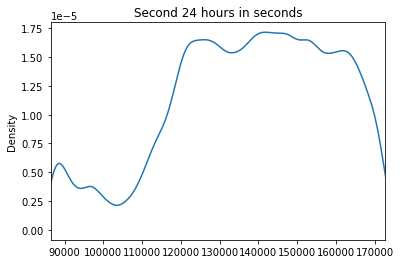

In [13]:
#let's see the other part as well. 
trans_another24 = time[time>86400]
trans_another24.plot.density()
plt.xlim(86400,time.max())
plt.title("Second 24 hours in seconds")

Yep, the overall trend looks same. 

Since it is described in seconds, it is a bit hard to read. Let's convert seconds into hour. I would like to describe each instance within 24 hours basis.

In [14]:
def sec_hour(seconds):
    hour = seconds // 3600 
    if hour >= 24:
        return hour - 24
    return hour 

In [15]:
time_hour = data['Time'].apply(sec_hour)

Text(0.5, 1.0, '# of transactions in 24 hour')

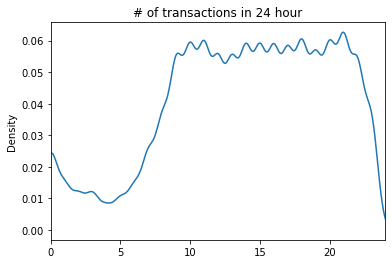

In [16]:
time_hour.plot.density()
plt.xlim(0,24)
plt.title("# of transactions in 24 hour")

This graph shows the number of transactions in 24 hours. Although it is not told when the first transaction was recorded. I think that it is almost safe to think that the first transaction was recorded at 0:00 and the hour in the graph describes time. This is because, it does make sense that the number of transactions is high from 9 to around 22. This range is a period when people are active. Moreover, it also makes sense that the number is low around 5 since it is morning.

Thus, assuming the graph describes actual time, I can conclude that the number of credit card transactions is low around 5am, then it keeps increasing from 5am to 9am. Then, from 9am to 10pm, it keeps high amount of transactions and it starts to decrease from around 10pm. 

In [17]:
#let's add column describing hour in the original dataset 
data['hour'] = time_hour

### Investigate amount variable 
I will see the distribution of amount variable and apply descriptive statistics to it. 

In [18]:
#apply descriptive statistics 
data['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

There is a huge gap between mean and median. Moreover, sd is also big. I can expect that there are some extreme values in this data. There is an interesting thing that the minimum trasnaction amount is 0. I don't know if it is error or is an actual data. 

Text(0.5, 1.0, 'limit y to 1000')

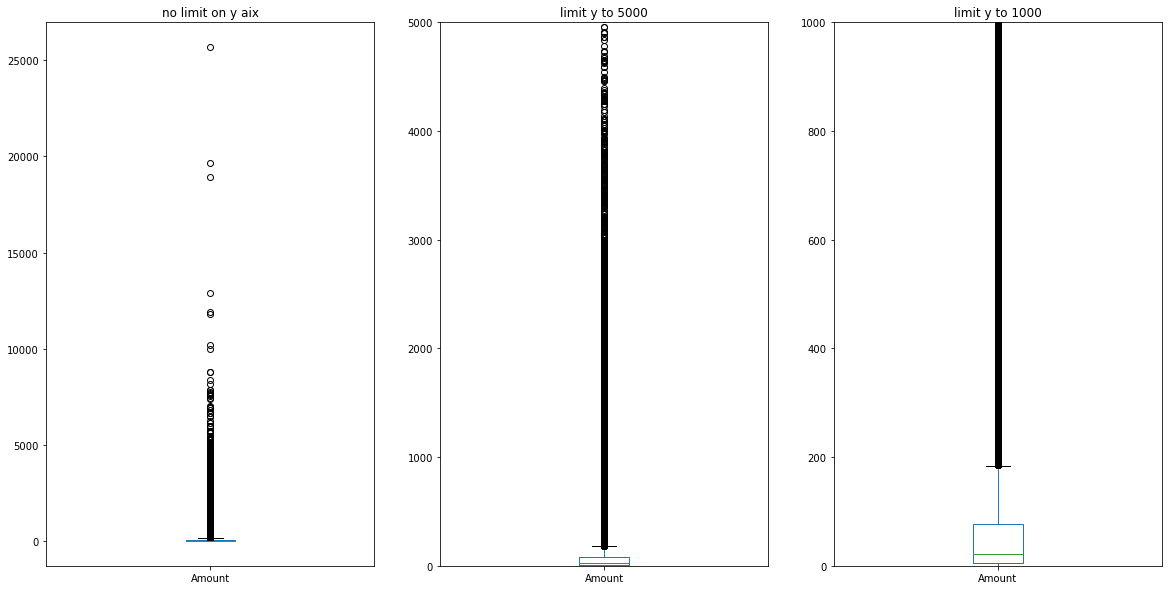

In [19]:
#boxplot
fig, axes = plt.subplots(1,3,figsize=(20, 10))
data['Amount'].plot.box(ax=axes[0])
axes[0].set_title('no limit on y aix')

data['Amount'].plot.box(ax=axes[1])
axes[1].set_ylim(0,5000)
axes[1].set_title('limit y to 5000')

data['Amount'].plot.box(ax=axes[2])
axes[2].set_ylim(0,1000)
axes[2].set_title('limit y to 1000')

It is obvious that there are many observations beyond the upper whisker. Most of values fall below 200.

<AxesSubplot:ylabel='Density'>

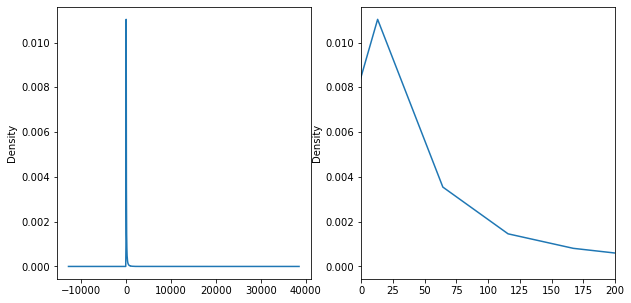

In [20]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
data['Amount'].plot.density(ax=axes[0])
data['Amount'].plot.density(ax=axes[1],xlim=(0,200))

It looks like that most typical transaction amount it around 22. Trasactions with more than that amount get rarer as the amount increases. 

In [21]:
#about 0 trasnaction amount. 
#see how many transactions have 0 amount of transaction
print('# of 0 amount transasction', sum(data["Amount"]==0))
print("# of 0 amount transasction in %", (sum(data["Amount"]==0) / len(data))*100)

# of 0 amount transasction 1825
# of 0 amount transasction in % 0.6407848121710491


In [22]:
data.loc[data['Amount']==0,'Class'].sum()

27

The kind of trasaction does exist in the dataset, but not many. It also looks like that the transaction contains some fradulent transactions. I cannot decide if they should be dropped from the dataset ot not. Since the dataset does not contain many positive class and the 0 amount of transaction might have some meaning, I will leave them for now. 

### Investigate relationships between predictors and the target variable (V variables) 

I will visualize distibution of each variable depending on the class. Then, after that, I will apply a hypotheisis test to see whether the difference caused by the class is statistically significant or not. 

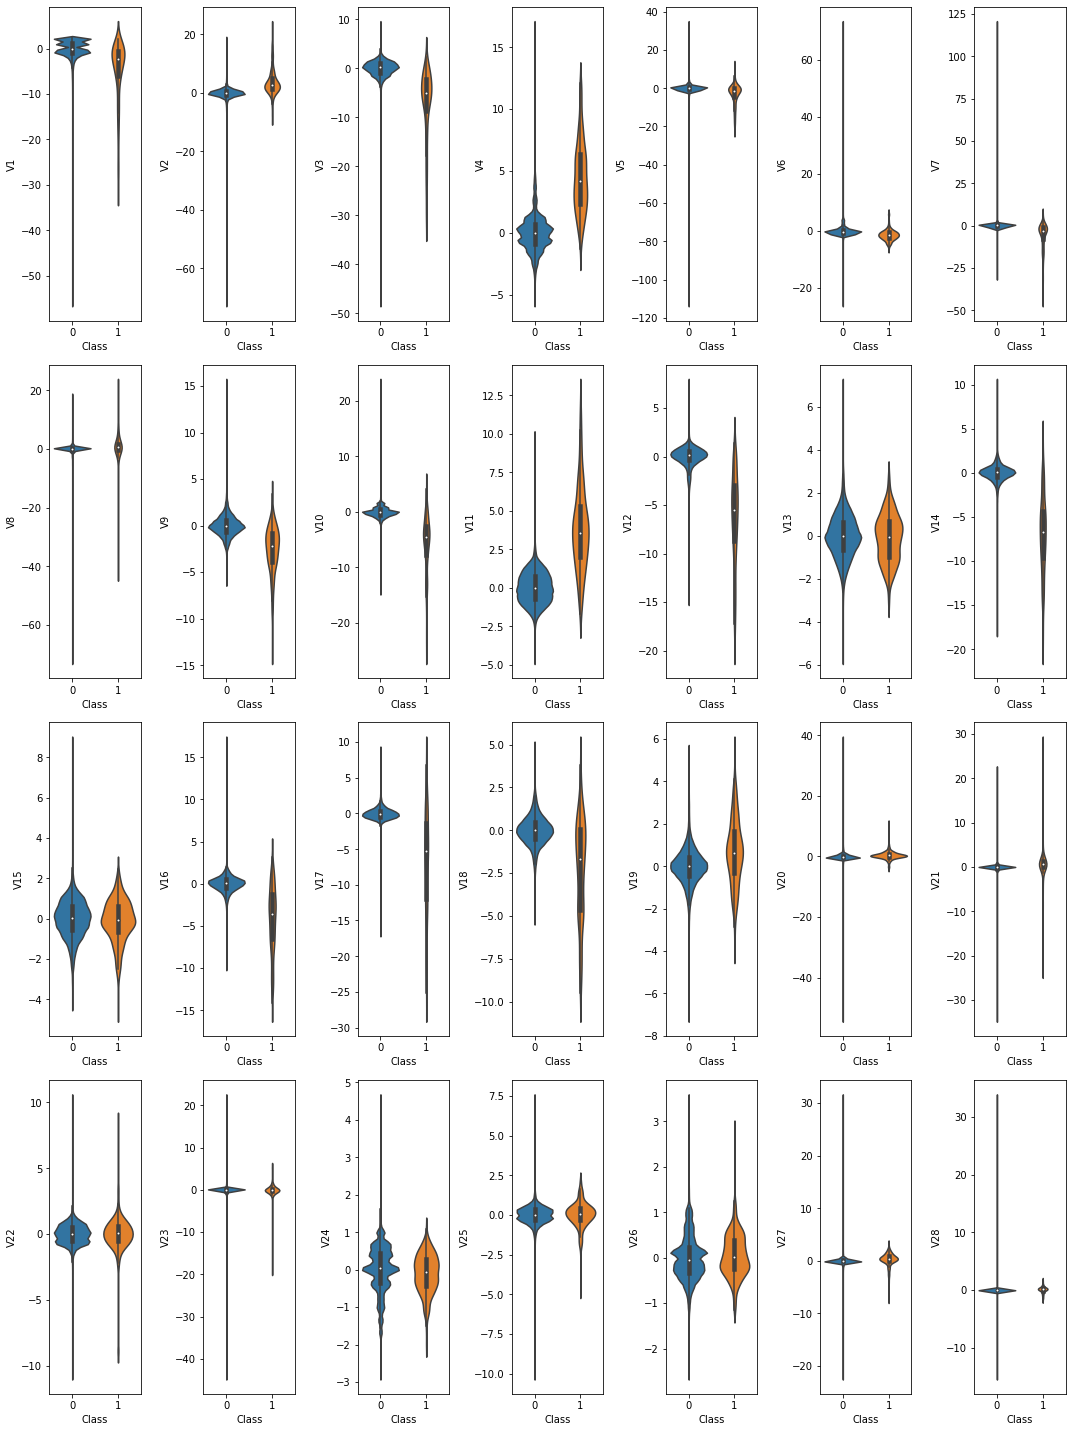

In [23]:
fig, axes = plt.subplots(4,7,figsize=(15,20))
v_value = 0 
for row in range(4):
    for column in range(7):
        sns.violinplot("Class",v_vars.columns[v_value],data=data, ax = axes[row,column])
        v_value += 1 
plt.tight_layout()

Focusing on a big picture, some variables have different distribution of them depending on classes. They need to be investigated further since they might be good predictors in making prediction. I think that those predictors are..
- V3, V4, V7, V9, V10, V11, V12, V14, V16, V17, and V18. 

I will see if the difference is statitically significant or not using hypothesis test. I can use Independent T Samples T-test or Man Whitney U test. Which one to use is depending on normality. 

In [24]:
#create a function that check normality and apply a suitable hypothesis test. 
from scipy import stats
def independent_group_stat_test(group1, group2, alpha_normal=0.05, alpha_test=0.05):
    """
    group1: 1D array like object 
    group2: 1D array like object 
    alpha_normal: significance level used for normality test 
    alpha_test: significance level used for hypothesis test. 
    """
    
    if(stats.kstest(group1,'norm').pvalue <=alpha_normal or stats.kstest(group2,'norm').pvalue <=alpha_normal):
        return stats.mannwhitneyu(group1, group2).pvalue
    
    else:
        
        return stats.ttest_ind(group1, group2).pvalue     

In [25]:
V_for_test = ['V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']
p_values = []
for v in V_for_test:
    class1 = data.loc[data['Class']==1,v]
    class0  = data.loc[data['Class']==0,v]
    
    p_values.append(independent_group_stat_test(class1,class0)) 

v_p_val = pd.Series(p_values,index=V_for_test)

In [26]:
v_p_val

V3     6.055240e-220
V4     1.812952e-248
V7     7.321168e-147
V9     4.471862e-154
V10    4.805565e-222
V11    2.455296e-226
V12    4.208013e-247
V14    7.357903e-261
V16    9.040861e-157
V17    4.609692e-124
V18     1.324481e-77
dtype: float64

It looks like that all of the difference among two groups in each of the variable is statistically significant. This information can be used for making new feature. 

### Target and Time 
In this section, I will investigate a relationship between Time variable and the target. Specifically, I would like to see when the frauds happen and time elapsed from the most recent fraud. 

Text(0.5, 1.0, '# of frauds for per hour')

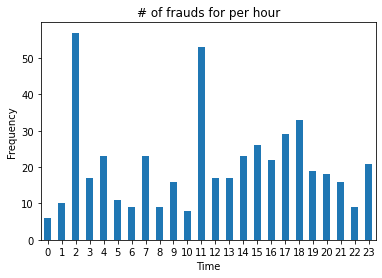

In [27]:
grouped_hour = data[["Class","hour"]].groupby(by='hour').sum()
grouped_hour.index = [int(x) for x in grouped_hour.index]
grouped_hour.plot.bar(rot=0,legend=None)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("# of frauds for per hour")

I can see that there are two peaks in the plot. The number of frauds suddenly increase at 2 and 11. Moreover, It seems like that there is a weak trend that the number increases until 4AM, decrease, and again increase from 12 to 18. Moreover, it seems like that the number of frauds is bigger in the afternoon. Let's check it. 

I define morning time as a periord from 0 to 11(inclusive) and afternoon as a period from 12 to 23(inclusive). 

In [28]:
print("# of frauds in Morning on average", grouped_hour[:12].mean())
print("# of frauds in Afternoon  on average", grouped_hour[12:].mean())

# of frauds in Morning on average Class    20.166667
dtype: float64
# of frauds in Afternoon  on average Class    20.833333
dtype: float64


In [29]:
print("After getting rid of 2 and 11 from Morning time ")
print("# of frauds in Morning on average", grouped_hour.loc[grouped_hour[:12].index.drop([2,11])].mean())
print("# of frauds in Afternoon  on average", grouped_hour[12:].mean())

After getting rid of 2 and 11 from Morning time 
# of frauds in Morning on average Class    13.2
dtype: float64
# of frauds in Afternoon  on average Class    20.833333
dtype: float64


In [30]:
print("Median")
print("# of frauds in Morning on average", grouped_hour[:12].median())
print("# of frauds in Afternoon  on average", grouped_hour[12:].median())

Median
# of frauds in Morning on average Class    13.5
dtype: float64
# of frauds in Afternoon  on average Class    20.0
dtype: float64


I got rid of 2 and 11 from Morning time because they have significantly high number of frauds and this distort the average number of frauds in Morning time. On average, there is 13.2 times of fraud in Morning time and 20.8 time in afternoon. This difference can also be seen through medians. Thus, it looks like that the frauds can happen more in Afternoon rather than Morning time. 

I mentioned that it seems like there is a weak trend in the the number of frauds. To see this, let's compute autocorrlation. 

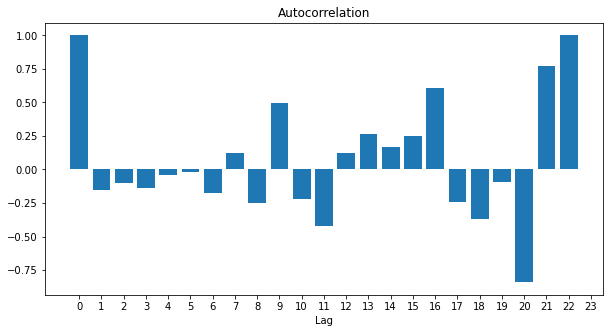

In [31]:
fig = plt.figure(figsize=(10,5))
auto_corr = [] 
for num in range(24):
    series = grouped_hour['Class']
    auto_corr.append(series.autocorr(num)) 
plt.bar(range(24),auto_corr)
plt.xticks(range(24));
plt.title('Autocorrelation')
plt.xlabel("Lag");

At lag 9, I can observe a relatively high corrlation. This matches my expectation. Although there are high correlations at bigger lags, I think that they are not really meaningful. This is because, they compare an original dataset and a very small size shifted series. 

Instead of putting all of data in a range from 0 to 24, it is also useful to put it in a range from 0 to 48 scale and see autocorrelation. Let's implement it. 

In [32]:
data['hour_48'] = data['Time'] // 3600
data['hour_48']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
284802    47.0
284803    47.0
284804    47.0
284805    47.0
284806    47.0
Name: hour_48, Length: 284807, dtype: float64

Text(0.5, 1.0, '# of frauds per hour (48 scale)')

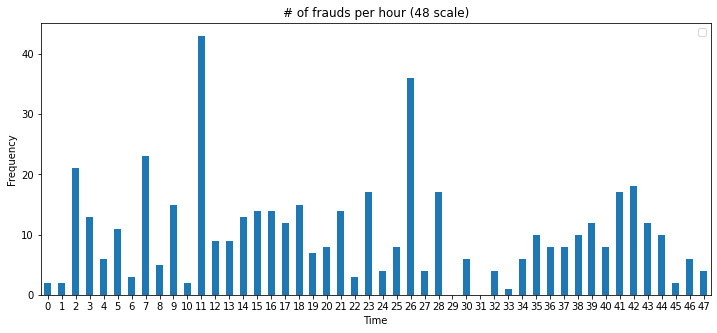

In [33]:
grouped_hour_48 = data[["Class","hour_48"]].groupby(by='hour_48').sum()
grouped_hour_48.index = [int(x) for x in grouped_hour_48.index]
grouped_hour_48.plot.bar(rot=0, figsize=(12,5))
plt.legend('')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('# of frauds per hour (48 scale)')

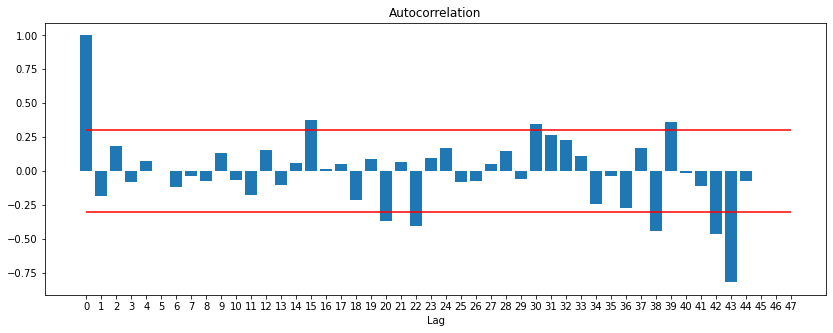

In [34]:
fig = plt.figure(figsize=(14,5))
auto_corr_48 = [] 
for num in range(48):
    series = grouped_hour_48['Class']
    auto_corr_48.append(series.autocorr(num)) 
plt.bar(range(48),auto_corr_48)
plt.xticks(range(48));
plt.title('Autocorrelation')
plt.xlabel("Lag");
plt.hlines([0.3,-0.3],xmin=0,xmax=47,color='red',linestyles='solid')

Overall it looks like that it is not very different from Autocorrelation plot based on 24 hours. One thing that I can see is that autocorrelation at 22 turns to be negative in this plot. And, there are some autocorrelations that are above or below 0.3 and -0.3 after lag 24. 

Since hours are still big scale, let's calculate autocorrelation based on seconds and minutes.  

Text(0.5, 1.0, '# of frauds per minute')

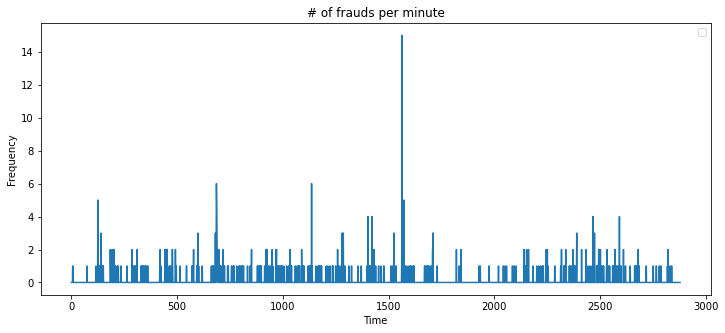

In [35]:
#minutes
data['minutes'] = data['Time'] // 60
grouped_minutes = data[["Class","minutes"]].groupby(by='minutes').sum()
grouped_minutes.index = [int(x) for x in grouped_minutes.index]
grouped_minutes.plot.line(rot=0, figsize=(12,5))
plt.legend('')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('# of frauds per minute')

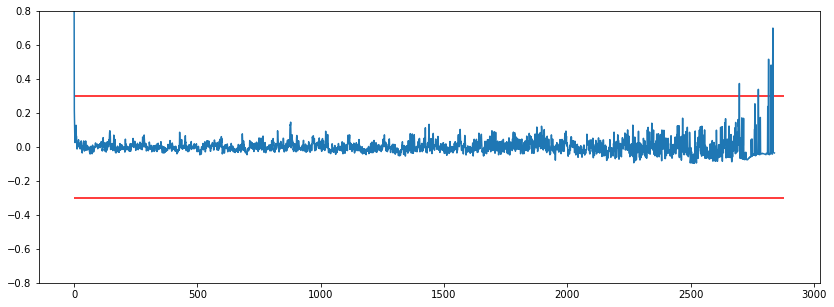

In [36]:
fig = plt.figure(figsize=(14,5))
auto_corr_minutes = [] 
for num in grouped_minutes.index:
    series = grouped_minutes['Class']
    auto_corr_minutes.append(series.autocorr(num)) 
plt.plot(auto_corr_minutes)
plt.ylim((-0.8,0.8))
plt.hlines([0.3,-0.3],grouped_minutes.index[0],grouped_minutes.index[-1],colors='red',linestyles='solid')

Here, I can see that there is no remarkable autocorrelation. In my opinion, it is because of the fact that only a few or none frauds happne in an interval based on minutes. Thus, I think that it will not be meaningfull to calculate autocorrelation in terms of seconds since it will just give more granularity to the interval and will lead a same result as this. 

Do frauds happen convergently? In other words, I would like to see what the time interval between a fraud and a most recent fraud.

In [40]:
frauds_time = data.loc[data['Class']==1,'Time']
frauds_time_shiftBy1 = frauds_time.shift(1)
#calculate the difference of seconds between a fraud and the most recent fraud. 
diff_sec = frauds_time - frauds_time_shiftBy1

In [41]:
diff_sec.describe()

count     491.000000
mean      346.114053
std       605.125508
min         0.000000
25%        25.000000
50%       126.000000
75%       398.500000
max      5489.000000
Name: Time, dtype: float64

In [42]:
diff_sec.describe()//60

count     8.0
mean      5.0
std      10.0
min       0.0
25%       0.0
50%       2.0
75%       6.0
max      91.0
Name: Time, dtype: float64

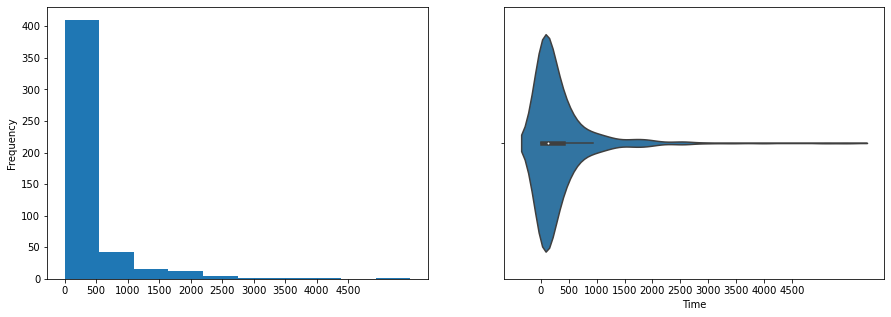

In [43]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
diff_sec.plot.hist(ax=axes[0],xticks=range(0,5000,500))
sns.violinplot(diff_sec,ax=axes[1])
axes[1].set_xticks(range(0,5000,500));
axes[1].set_xticklabels(range(0,5000,500));

Accoding to the median value, it looks like that a fraud tends to happen 2 minutes after the most recent fraud. Moreover, when looking at the distribution, most of time intervals fall below 500 seconds(8 minutes). 
Alright, I am stopping investigating the relationship between time and the response variable. Let's move onto the relationship between Amount and the response variable. 

### Target and Amount

In this section, I will analyze the relationship between Amount and the target variable. First, let's see if there is a difference between normal transaction amount and trasaction amount associated with frauds. 

In [44]:
frauds_amount = data.loc[data['Class']==1,'Amount']
normal_amount =data.loc[data['Class']==0,'Amount']

In [45]:
print("frauds")
print(frauds_amount.describe())
print("______________________")
print('normal')
print(normal_amount.describe())

frauds
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
______________________
normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


The distribution of normal transaction amounts is not really different from the distribution fo all of values in Amount variable. This makes sense that a very small portion of the dataset is fradulent. 

(0.0, 1000.0)

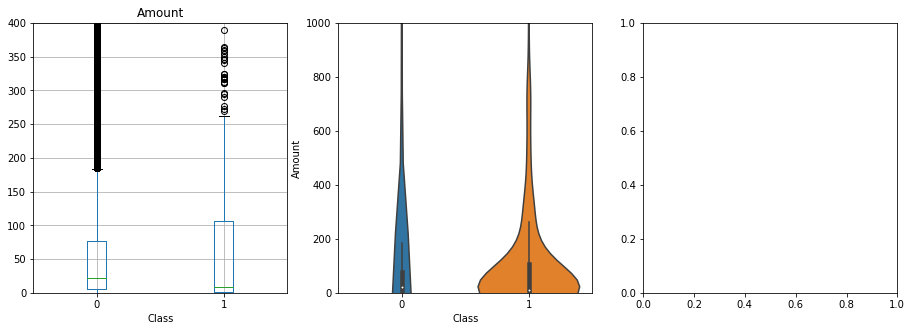

In [46]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
data.boxplot('Amount','Class',ax=axes[0])
axes[0].set_ylim(0,400)
plt.suptitle("")
sns.violinplot("Class", "Amount", data=data,ax=axes[1])
axes[1].set_ylim(0,1000)

According to the descriptive statistics and the boxplots, there are several things I can observe. 
First, although the normal transactions have extreme transaction amounts, the standard deviation is slightly smaller than the standard deviation of fraudulant transactions. Both of the standard deviations is really large;For class 0, mean of 88 with sd of 250 and for class 1, mean of 122 with sd of 256. Thus, in both of the classes, the data is spread really widely. 

According to the box plot and the violin plot, I can see that in class 1, first 50% of values fall in the very small range of values(0 to 9). Then, values between 50th and 75th percentile have relatively wide range. This imbalance might indicate that fraudulant transaction amount tend to cluster in a range from 0 to 9. Although this distirbution might be changed if i get more data, the situation where 50% of values fall in such a small range of value is something peculiar. In normal transactions, the distribution is less skewed. The first 50% of values fall in a range from 0 to 22. Furthermore, the range between 50th and 75th percentile is smaller.  

I can run a hypothesis test to see if the transaction amount of class 0 is statistically different from amount of class 1. Let's test it. 

In [47]:
#use mannwhitney due to non-normaliry 
stats.mannwhitneyu(frauds_amount,normal_amount)

MannwhitneyuResult(statistic=61833399.0, pvalue=4.289236155420109e-06)

p value is less tha 0.05. The difference is statistically significant. 

### outliers and class

Seein Amount variable, it is clear that there are many outliers. I would like to see if those outliers are associated with frauds. Or Are there other relationships? As we have seen, it is likely that the fraudulent transaction amount gather in a very small range of values, but normal transaction amounts can also take values in the range. Moreover, most of values in the range will be normal transaction amount since the number of frauds is really small. 

In [48]:
data['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [49]:
## see outliers in Amount variable. 
amount = data['Amount']
## standardize 
stand_amount = pd.Series(stats.zscore(amount))
stand_amount.head()

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
dtype: float64

Let's see observations with more than 3 sds. 

In [50]:
outliers = stand_amount[(stand_amount>=3) | (stand_amount<=-3)]
print("The proportion of outliers in Amount variable")
print("{}%".format((len(outliers)/len(data))*100))

The proportion of outliers in Amount variable
1.431144599676272%


In [51]:
#see proportions of classes in the outliers.
outliers_data = data.loc[outliers.index,:]
print("the proportion of class 0 is {}".format((1-outliers_data['Class'].mean())))
print("the proportion of class 1 is {}".format(outliers_data['Class'].mean()))

the proportion of class 0 is 0.9973012757605496
the proportion of class 1 is 0.0026987242394504417


Almost all of observations including extreme transaction amount is normal transaction. One thing to note is that since the standard deviation is very big, which is around 250, and the mean is around 90, the amount considered as outliers are all very high transaction amount. No very low transaction amount. 

I could drop them from dataset, but I do not really want to drop observations with class 1 simply because the number of positive observations is small. If keeping them reduce the performance of models, I should drop them. Thus, I do not decide if I should drop the outliers or not at this stage.

## Colinearlity
I will see if there is a linear relatinship between predictor variables using Pearson correlation coefficient and other matrices. 

<AxesSubplot:>

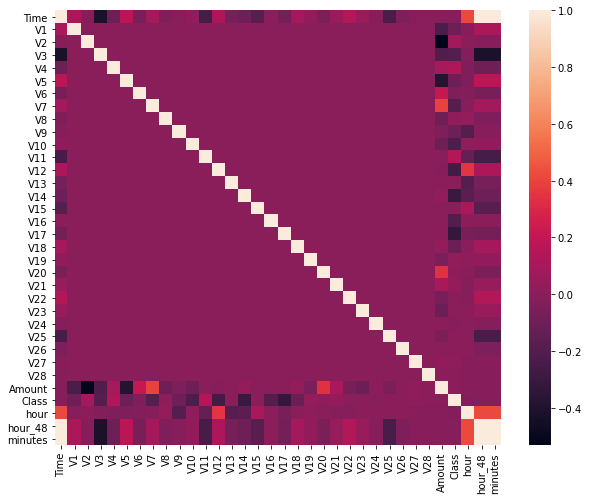

In [52]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(data.corr())

I do not think that there are very strongly correlated variables. Although you can that observe some variables related to time have white colors, they are related to other time variables. Thus, their color is not meaningful.

### TIme and Amount 
Investigate the relationship between variables whose information is clear to us. Specifically, I will see the typical amount of transaction based on time. 

Text(0.5, 1.0, 'Typical Amount of Transaction per hour using Median')

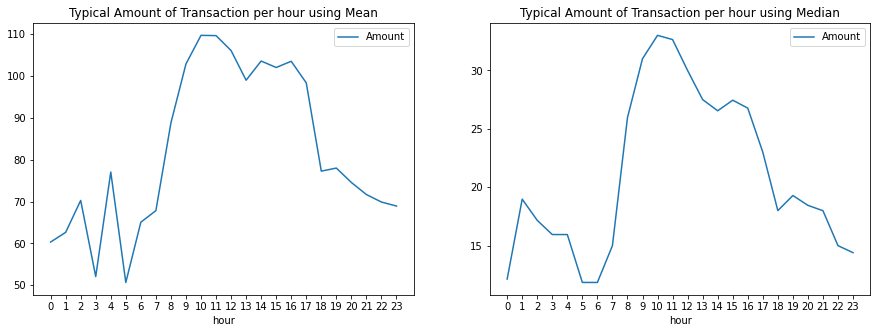

In [53]:
fig, axes  = plt.subplots(1,2,figsize=(15,5))
#using mean
amount_hour_mean = data[['Amount','hour']].groupby(by='hour').mean()
amount_hour_mean.plot(ax=axes[0])
axes[0].set_xticks(range(0,24))
axes[0].set_title("Typical Amount of Transaction per hour using Mean")

#using median 

amount_hour_med = data[['Amount','hour']].groupby(by='hour').median()
amount_hour_med.plot(ax=axes[1])
axes[1].set_xticks(range(0,24))
axes[1].set_title("Typical Amount of Transaction per hour using Median")

Because of unsual values of Amount, the plot using Mean produces high values as typical amounts. Moreover, the scale of y-axis is very differen among the two plots. Thus, I can be sure that distribution of amounts in each hour is also skewed. Thus, for seeing typical amount, it is better to look at the plot using Median. 

When looking at the right plot, I can see the trend of amounts based on time. I can recognize that transaction amount increse from 6 to 11. Then, it starts to decrease. There is a small increase from 0 to 1. 

Is there a relationship between the typical amount and the number of frauds? I can plot the scatter plot.

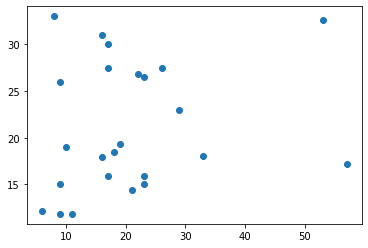

In [54]:
plt.scatter(grouped_hour,amount_hour_med)

In [55]:
stats.pearsonr(grouped_hour.iloc[:,0],amount_hour_med.iloc[:,0])

(0.1930950762883769, 0.36598525692542117)

According to the scatter plot and the pearson correlation coefficient, I cannot see a peculiar relatinship between them. 

## Future Engineering 

Based on findings, I will create several new features. There are three features that I am going to make.

- A feature that indicates a transaction time is in morning or afternoon. This is because, it is likely that the number of frauds on average is bigger in the afternoon. 

- A lag feature. 

- A feature that indicates that the trasnaction amount ranges from 0 to 9. This is because, many fradulent transactions fall into this range. 